<a href="https://colab.research.google.com/github/Konic-NLP/5922-deep-learning/blob/main/lab_assignment1_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Code**

---




In [ ]:
import sklearn.datasets as dt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score as cv
import pandas as pd

In [ ]:
#look the data size
from sklearn.datasets import load_digits
digits=load_digits()
data=digits.data
print(data.shape)
X,y=data,digits.target

(1797, 64)


In [ ]:
#look the distribution of the samples in each class
import numpy as np
np.unique(y)
from collections import Counter
counter=Counter
print(sorted(counter(y).items()))

[(0, 178), (1, 182), (2, 177), (3, 183), (4, 181), (5, 182), (6, 181), (7, 179), (8, 174), (9, 180)]


In [ ]:
#split the data
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=1,test_size=0.2,stratify=y,shuffle=True)

In [ ]:
#normilized the data 
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test)

In [ ]:
# the function for the train, it defines the hyperparameter, and also
#output the important information 
def run(activation='logistic',num_units=10,layers=2):
  mlp=MLPClassifier(activation=activation,hidden_layer_sizes=[num_units]*layers,max_iter=600,verbose=False)
  scores=cv(mlp,x_train,y_train,cv=10,scoring='accuracy')
  print(scores.mean(),scores.std())
  mlp.fit(x_train,y_train)
  print(mlp.get_params,mlp.out_activation_)
  print('the train accurancy is %.3f '%mlp.score(x_train,y_train))
  print('the test accurancy is %.3f '%mlp.score(x_test,y_test))
  mat=confusion_matrix(y_test,mlp.predict(x_test))
  sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False)
  plt.xlabel("True Label")
  plt.ylabel("Predicted Lab")


1.compare the activation function 

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

0.9652340714840714 0.015188086709381859


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(activation='logistic', hidden_layer_sizes=[10], max_iter=600)> softmax
the train accurancy is 0.994 
the test accurancy is 0.953 


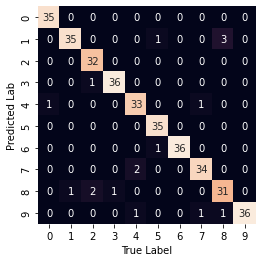

In [ ]:
run()

In [ ]:
strings='Implicit||Wr|Comm|Null|Null||并且|Expansion.Conjunction||||||68..98|Inh|Null|Null|Null||101..133|Inh|Null|Null|Null|||||||101|DEFAULT|'
print(strings.count('|'))

33


0.949902874902875 0.015754056016467656
<bound method BaseEstimator.get_params of MLPClassifier(activation='tanh', hidden_layer_sizes=[10, 10], max_iter=600)>
the train accurancy is 1.000 
the test accurancy is 0.950 


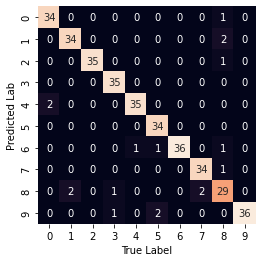

In [ ]:
run('tanh')

0.9527000777000776 0.012310371387276635
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[10, 10], max_iter=600)>
the train accurancy is 1.000 
the test accurancy is 0.953 


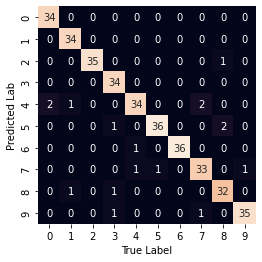

In [ ]:
run('relu')

2.compare the impact of number of units in each layer

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

0.7397435897435897 0.07380377512901248


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(activation='logistic', hidden_layer_sizes=[5, 5], max_iter=600)> softmax
the train accurancy is 0.927 
the test accurancy is 0.864 


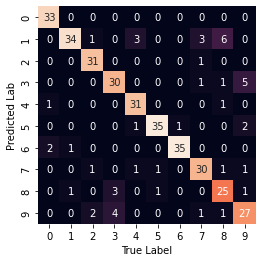

In [ ]:
run(num_units=5)

0.9603389665889666 0.014246501303471309
<bound method BaseEstimator.get_params of MLPClassifier(activation='logistic', hidden_layer_sizes=[20, 20], max_iter=600)>
the train accurancy is 1.000 
the test accurancy is 0.942 


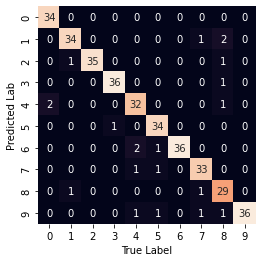

In [ ]:
run(num_units=20)

0.9624368686868685 0.011256317939588955
<bound method BaseEstimator.get_params of MLPClassifier(activation='logistic', hidden_layer_sizes=[30, 30], max_iter=600)>
the train accurancy is 1.000 
the test accurancy is 0.950 


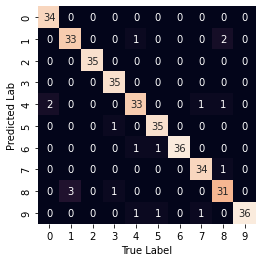

In [ ]:
run(num_units=30)

0.9638209013209014 0.013832451855509083
<bound method BaseEstimator.get_params of MLPClassifier(activation='logistic', hidden_layer_sizes=[40, 40], max_iter=600)>
the train accurancy is 1.000 
the test accurancy is 0.958 


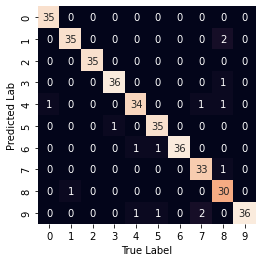

In [ ]:
run(num_units=40)

0.9666083916083916 0.01193789930385916
<bound method BaseEstimator.get_params of MLPClassifier(activation='logistic', hidden_layer_sizes=[65, 65], max_iter=600)>
the train accurancy is 1.000 
the test accurancy is 0.961 


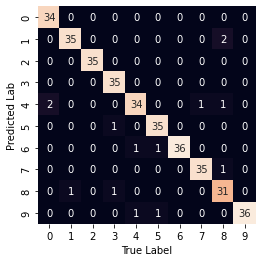

In [ ]:
run(num_units=65)

0.975665306915307 0.01128394366639607
<bound method BaseEstimator.get_params of MLPClassifier(activation='logistic', hidden_layer_sizes=[70, 70], max_iter=600)>
the train accurancy is 1.000 
the test accurancy is 0.967 


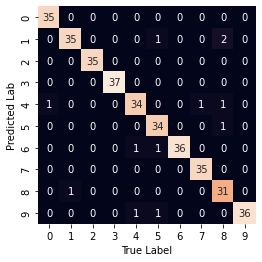

In [ ]:
run(num_units=70)

3.compare the layers of the MLP

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

0.9554972804972806 0.016760654318304275


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(activation='logistic', hidden_layer_sizes=[10], max_iter=600)> softmax
the train accurancy is 0.998 
the test accurancy is 0.953 


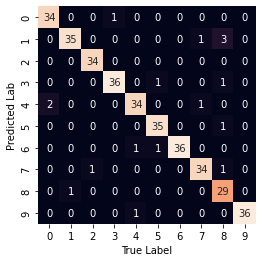

In [ ]:
run(layers=1)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

0.8441239316239317 0.07525056655428974


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(activation='logistic', hidden_layer_sizes=[10, 10, 10],
              max_iter=600)>
the train accurancy is 0.939 
the test accurancy is 0.883 


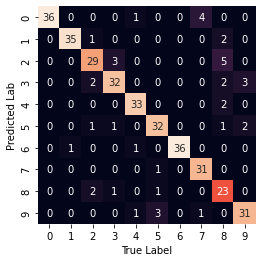

In [ ]:
run(layers=3)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

0.6597125097125097 0.11581201590582847


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(activation='logistic', hidden_layer_sizes=[10, 10, 10, 10],
              max_iter=600)>
the train accurancy is 0.585 
the test accurancy is 0.522 


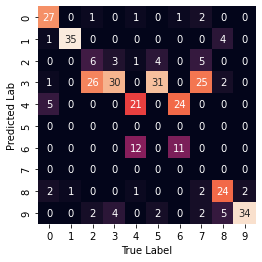

In [ ]:
run(layers=4)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

0.4481594794094795 0.06225076337337279


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(activation='logistic', hidden_layer_sizes=[10, 10, 10, 10, 10],
              max_iter=600)>
the train accurancy is 0.529 
the test accurancy is 0.447 


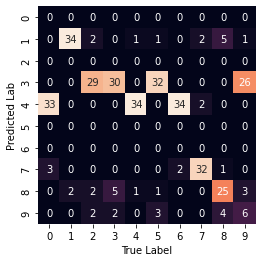

In [ ]:
run(layers=5)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

0.3173805361305361 0.17724359646288573
<bound method BaseEstimator.get_params of MLPClassifier(activation='logistic',
              hidden_layer_sizes=[10, 10, 10, 10, 10, 10], max_iter=600)>
the train accurancy is 0.101 
the test accurancy is 0.100 


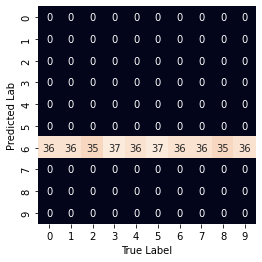

In [ ]:
run(layers=6)

0.09951437451437453 0.003220381753329201
<bound method BaseEstimator.get_params of MLPClassifier(activation='logistic',
              hidden_layer_sizes=[10, 10, 10, 10, 10, 10, 10, 10, 10],
              max_iter=600)> softmax
the train accurancy is 0.102 
the test accurancy is 0.103 


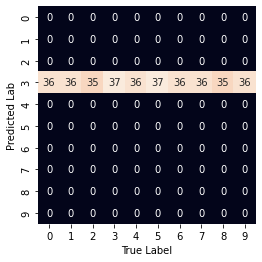

In [ ]:
run(layers=9)

further experiment

0.9721736596736597 0.012821046261653011
<bound method BaseEstimator.get_params of MLPClassifier(activation='logistic', hidden_layer_sizes=[20], max_iter=600)> softmax
the train accurancy is 1.000 
the test accurancy is 0.958 


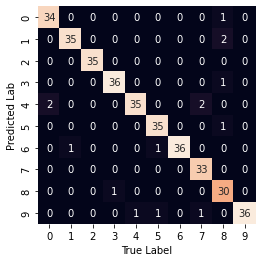

In [ ]:
run(layers=1,num_units=20)

0.9527000777000778 0.014457161241602307
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[20, 20, 20], max_iter=600)> softmax
the train accurancy is 1.000 
the test accurancy is 0.956 


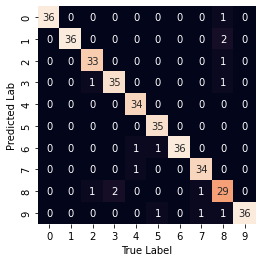

In [ ]:
run('relu',num_units=20,layers=3)

0.9673271173271175 0.01727453609472055
<bound method BaseEstimator.get_params of MLPClassifier(activation='tanh', hidden_layer_sizes=[20, 20, 20], max_iter=600)> softmax
the train accurancy is 1.000 
the test accurancy is 0.961 


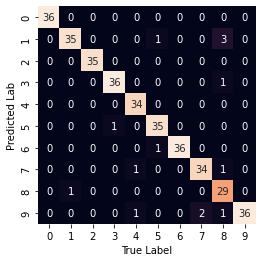

In [ ]:
run('tanh',num_units=20,layers=3)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.9366987179487181 0.020428911263899126
<bound method BaseEstimator.get_params of MLPClassifier(activation='logistic', hidden_layer_sizes=[20, 20, 20],
              max_iter=600)> softmax
the train accurancy is 0.999 
the test accurancy is 0.914 


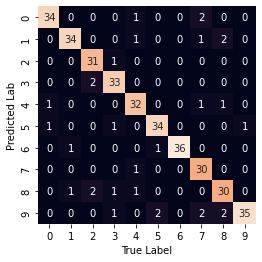

In [ ]:
run('logistic',num_units=20,layers=3)

0.9624611499611498 0.01759021047733511
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30, 30, 30, 30], max_iter=600)> softmax
the train accurancy is 1.000 
the test accurancy is 0.967 


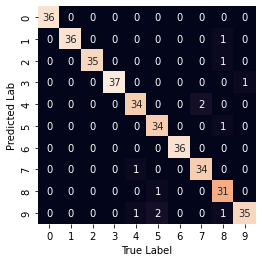

In [ ]:
run('relu',num_units=30,layers=4)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.917166860916861 0.022890955977030326
<bound method BaseEstimator.get_params of MLPClassifier(activation='logistic', hidden_layer_sizes=[30, 30, 30, 30],
              max_iter=600)> softmax
the train accurancy is 0.997 
the test accurancy is 0.914 


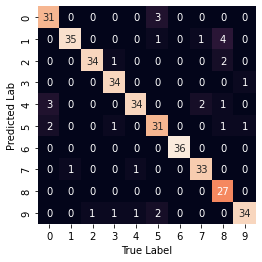

In [ ]:
run('logistic',num_units=30,layers=4)

0.964539627039627 0.013297234556421822
<bound method BaseEstimator.get_params of MLPClassifier(activation='tanh', hidden_layer_sizes=[30, 30, 30, 30],
              max_iter=600)> softmax
the train accurancy is 1.000 
the test accurancy is 0.956 


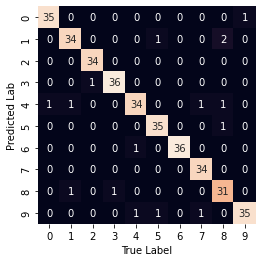

In [ ]:
run('tanh',num_units=30,layers=4)

0.9673174048174049 0.015822823032793913
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30, 30, 30], max_iter=600)> softmax
the train accurancy is 1.000 
the test accurancy is 0.972 


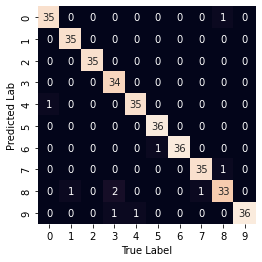

In [ ]:
run('relu',num_units=30,layers=3)

0.9415743978243978 0.02059123584488014
<bound method BaseEstimator.get_params of MLPClassifier(activation='logistic', hidden_layer_sizes=[30, 30, 30],
              max_iter=600)> softmax
the train accurancy is 1.000 
the test accurancy is 0.950 


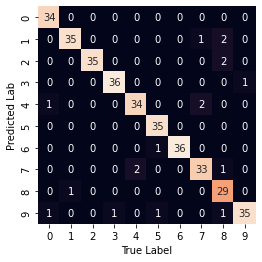

In [ ]:
run('logistic',num_units=30,layers=3)

0.9686965811965811 0.017068450210826862
<bound method BaseEstimator.get_params of MLPClassifier(activation='tanh', hidden_layer_sizes=[30, 30, 30], max_iter=600)> softmax
the train accurancy is 1.000 
the test accurancy is 0.944 


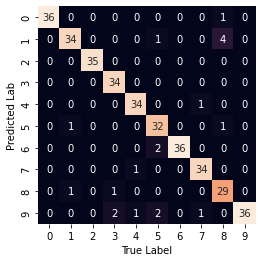

In [ ]:
run('tanh',num_units=30,layers=3)

In [ ]:
# the similar function for comparing the epochs and the data
import statistics

%matplotlib inline

start_num_epochs = 50
finish_num_epochs = 600
inc_amt = 20





def run1(activation='relu',num_units=30,layers=1,portion=1):
  pred_scores = []
  num_epochs = []
  for epoch_count in range(start_num_epochs, finish_num_epochs, inc_amt):
    mlp=MLPClassifier(activation=activation,hidden_layer_sizes=[num_units]*layers,max_iter=epoch_count,verbose=False)
    if portion!=1:
      xtrain,_,ytrain,_=train_test_split(x_train,y_train,test_size=1-portion,shuffle=True,random_state=1,stratify=y_train)
      # split again in order to get the precise portion of the training data with the same ratio of the class
    # print(xtrain.shape,ytrain.shape)
    else:
      xtrain,ytrain=x_train,y_train
    std=StandardScaler()
    xtrain=std.fit_transform(xtrain)
    xtest=std.transform(x_test)
    mlp.fit(xtrain,ytrain)
    print(mlp.get_params)
    score=mlp.score(xtest,y_test)


    pred_scores.append(score)
    num_epochs.append(epoch_count)
  print(str(sum(pred_scores)/len(pred_scores)),statistics.pstdev(pred_scores))
  return pred_scores,num_epochs
 

In [ ]:
pred1,epoch1=run1()

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=50)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=70)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (90) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=90)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (110) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=110)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=130)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=150)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (170) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=170)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (190) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=190)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (210) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=210)>
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=230)>
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=250)>
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=270)>
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=290)>
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=310)>
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=330)>
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=350)>
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=370)>
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=390)>
<bound method BaseEstimator.get_params o

In [ ]:
pred2,epoch2=run1(portion=0.75)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=50)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=70)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (90) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=90)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (110) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=110)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=130)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=150)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (170) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=170)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (190) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=190)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (210) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=210)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (230) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=230)>
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=250)>
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=270)>
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=290)>
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=310)>
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=330)>
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=350)>
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=370)>
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=390)>
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=410)>
<bound method BaseEstimator.get_params o

In [ ]:
pred3,epoch3=run1(portion=0.5)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=50)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=70)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (90) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=90)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (110) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=110)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=130)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=150)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (170) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=170)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (190) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=190)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (210) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=210)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (230) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=230)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=250)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (270) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=270)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (290) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=290)>
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=310)>
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=330)>
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=350)>
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=370)>
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=390)>
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=410)>
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=430)>
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=450)>
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=470)>
<bound method BaseEstimator.get_params o

In [ ]:
pred4,epoch4=run1(portion=0.25)

<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=50)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (70) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=70)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (90) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=90)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (110) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=110)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (130) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=130)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=150)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (170) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=170)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (190) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=190)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (210) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=210)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (230) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=230)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=250)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (270) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=270)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (290) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=290)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=310)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (330) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=330)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (350) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=350)>


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (370) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=370)>
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=390)>
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=410)>
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=430)>
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=450)>
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=470)>
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=490)>
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=510)>
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=530)>
<bound method BaseEstimator.get_params of MLPClassifier(hidden_layer_sizes=[30], max_iter=550)>
<bound method BaseEstimator.get_params o

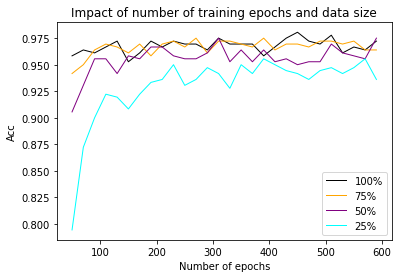

In [ ]:
plt.plot(epoch1, pred1, c='black', linewidth = 1,label='100%')
plt.plot(epoch2, pred2, c='orange', linewidth = 1,label='75%')
plt.plot(epoch3, pred3, c='purple', linewidth = 1,label='50%')
plt.plot(epoch4, pred4, c='cyan', linewidth = 1,label='25%')
plt.xlabel("Number of epochs")
plt.ylabel("Acc")
plt.title("Impact of number of training epochs and data size")
plt.legend(loc='lower right')
plt.show()
